In [1]:
# Setting the working directory
import os
os.chdir('/Users/ssg/Desktop/')

In [2]:
import sys
sys.path = ['/Users/ssg/Desktop/Python/packge'] + sys.path

In [3]:
# Importing relevant libraries
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Checking the version of the sklearn library
import sklearn
print("sklearn_version :" , sklearn.__version__)
import pandas
print("pandas_version :" , pandas.__version__)
import numpy
print("numpy_version :" , numpy.__version__)

sklearn_version : 0.20.2
pandas_version : 0.24.1
numpy_version : 1.16.2


In [5]:
# Reading the dataset
df_hr = pd.read_csv('IBM_HR_ATT_data.csv')

# Explore the Data

In [6]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Get information about the features
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
# Get summary stats for the numeric variable
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Get summary stats for the categorical features
df_hr.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
# Create the feature/flag for Dep variable - Attrition status
df_hr.Attrition = df_hr.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
# View the data - As you can see that the Attrition is now a flag variable indicating 'Yes' as 1 and 'No' as 0
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
# Explore different features for any kind of inconsistent values
print('Age:',sorted(df_hr.Age.unique()))
print('YearsWithCurrManager:',df_hr.YearsWithCurrManager.unique())
print('MonthlyIncome:',df_hr.MonthlyIncome.unique())
print('JobSatisfaction:',df_hr.JobSatisfaction.unique())
print('TotalWorkingYears:',df_hr.TotalWorkingYears.unique())
print('Education:',df_hr.Education.unique())
print('YearsWithCurrManager:',df_hr.YearsWithCurrManager.unique())
print('YearsSinceLastPromotion:',df_hr.YearsSinceLastPromotion.unique())
print('Over18:',df_hr.Over18.unique())
print('StandardHours:',df_hr.StandardHours.unique())
print('EmployeeCount:',df_hr.StandardHours.unique())
print('EmployeeNumber:',df_hr.StandardHours.unique())

Age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
YearsWithCurrManager: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
MonthlyIncome: [5993 5130 2090 ... 9991 5390 4404]
JobSatisfaction: [4 2 3 1]
TotalWorkingYears: [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
Education: [2 1 4 3 5]
YearsWithCurrManager: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
YearsSinceLastPromotion: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
Over18: ['Y']
StandardHours: [80]
EmployeeCount: [80]
EmployeeNumber: [80]


In [13]:
# Convert the categorical features
# Creating dummies for all these variables
d_bustrvl = pd.get_dummies(df_hr['BusinessTravel'], prefix='bustrvl')
d_dep = pd.get_dummies(df_hr['Department'], prefix='dep')
d_eduf = pd.get_dummies(df_hr['EducationField'], prefix='eduf')
d_gender = pd.get_dummies(df_hr['Gender'], prefix='gend')
d_jobrole = pd.get_dummies(df_hr['JobRole'], prefix='jobrole')
d_maritstat = pd.get_dummies(df_hr['MaritalStatus'], prefix='maritalstat') 
d_overtime = pd.get_dummies(df_hr['OverTime'], prefix='overtime')

In [14]:
# Create a list of final features (predictors)
feature_x = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
             'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
             'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
             'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
             'YearsWithCurrManager','d_bustrvl','d_dep','d_eduf','d_gender',
             'd_jobrole','d_maritstat','d_overtime']

In [15]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
                  'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                  'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
                  'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion','YearsWithCurrManager']
df_hr_cont = df_hr[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_hr_new = pd.concat([d_bustrvl,d_dep,d_eduf,d_gender,
                       d_jobrole,d_maritstat,d_overtime,
                       df_hr_cont,df_hr['Attrition']],axis=1)

In [16]:
# Lets look at the final data and print its shape
print(df_hr_new.shape)

(1470, 52)


In [17]:
df_hr_new.head()

,bustrvl_Non-Travel,bustrvl_Travel_Frequently,bustrvl_Travel_Rarely,dep_Human Resources,dep_Research & Development,dep_Sales,eduf_Human Resources,eduf_Life Sciences,eduf_Marketing,eduf_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,0,1,0,0,1,0,1,0,0,...,1,0,8,0,1,6,4,0,5,1
1,0,1,0,0,1,0,0,1,0,0,...,4,1,10,3,3,10,7,1,7,0
2,0,0,1,0,1,0,0,0,0,0,...,2,0,7,3,3,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,3,0,8,3,3,8,7,3,0,0
4,0,0,1,0,1,0,0,0,0,1,...,4,1,6,3,3,2,2,2,2,0


# Exploratory data analysis

(0, 120)

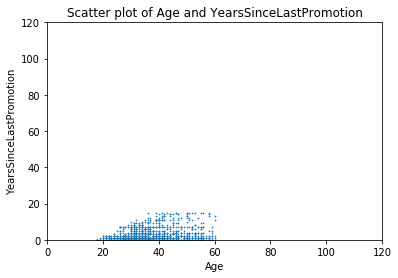

In [18]:
# Scatter Plot Between Age and HourOfTheDay
plt.scatter(df_hr_new['Age'], df_hr_new['YearsSinceLastPromotion'], s=0.5)
plt.title('Scatter plot of Age and YearsSinceLastPromotion')
plt.xlabel('Age')
plt.ylabel('YearsSinceLastPromotion')
plt.xlim(0, 120)
plt.ylim(0, 120)

In [19]:
# Calculating Pearson Correlation Between Age and MonthlyIncome
pd.set_option('display.width', 200)
pd.set_option('precision', 2)
correlations = df_hr_new[['Age', 'MonthlyIncome']].corr(method='pearson')
print(correlations)

               Age  MonthlyIncome
Age            1.0            0.5
MonthlyIncome  0.5            1.0


Text(0, 0.5, 'Frequency')

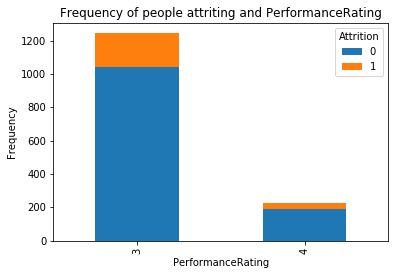

In [20]:
# Effect on Attrition on the Basis of PerformanceRating
data_dow_status = df_hr_new.groupby(['PerformanceRating', 'Attrition'])['PerformanceRating'].count().unstack('Attrition').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people attriting and PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Frequency')

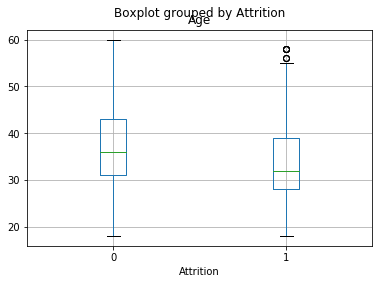

In [21]:
# If age plays any role for attrition
# Plotting Box Plot of Patients’ Age by Status
df_hr_new.boxplot(column=['Age'], return_type='axes', by='Attrition')
plt.show()

/Users/ssg/Desktop/Python/packge/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


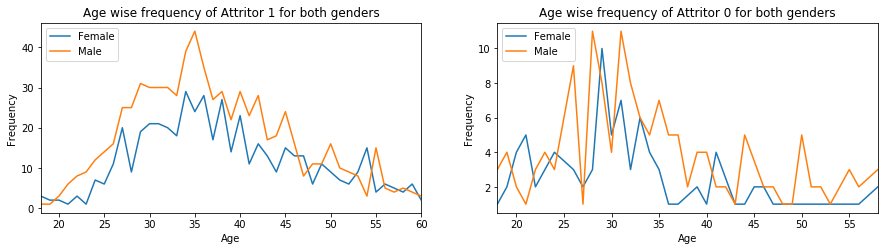

In [22]:
# Plotting Line Plot of Age by Gender for attrition status
df_hr.Gender = df_hr.Gender.apply(lambda x: 1 if x == 'Male' else 0)
plt.figure(figsize=(15,3.5))
for i, Attrition in enumerate([1, 0]):
    data_show = df_hr[df_hr['Attrition']==i]
    plt.subplot(1, 2, i+1)
    for gender in [0, 1]:
        data_gender = data_show[data_show['Gender']==gender]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()
    plt.title('Age wise frequency of Attritor %s for both genders'%Attrition)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')

In [23]:
# Get an idea about the event rate/attrition rate
df_hr_new['Attrition'].value_counts()/len(df_hr_new)

0    0.84
1    0.16
Name: Attrition, dtype: float64

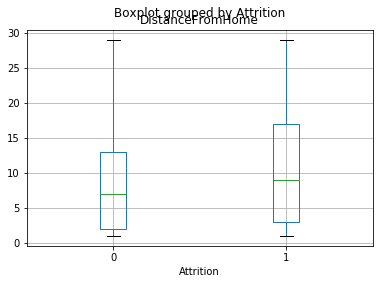

In [24]:
# Plotting Box Plot of DistanceFromHome by Attrition
df_hr_new.boxplot(column=['DistanceFromHome'], return_type='axes', by='Attrition')
plt.show()

In [25]:
# We can do some further EDA for a pool of features as well
subset_attributes = ['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome',
                    'TotalWorkingYears','YearsWithCurrManager','YearsWithCurrManager',
                    'PerformanceRating','JobSatisfaction']
att_yes = round(df_hr_new[df_hr_new['Attrition'] == 1][subset_attributes].describe(),2)
att_no = round(df_hr_new[df_hr_new['Attrition'] == 0][subset_attributes].describe(),2)
pd.concat([att_yes, att_no], axis=1, keys=['Attritor', 'Non Attritor'])

Attritor                                                                                                                                        Non Attritor                             \
           Age DistanceFromHome Education MonthlyIncome TotalWorkingYears YearsWithCurrManager YearsWithCurrManager PerformanceRating JobSatisfaction          Age DistanceFromHome Education   
count   237.00           237.00    237.00        237.00            237.00               237.00               237.00            237.00          237.00      1233.00          1233.00   1233.00   
mean     33.61            10.63      2.84       4787.09              8.24                 2.85                 2.85              3.16            2.47        37.56             8.92      2.93   
std       9.69             8.45      1.01       3640.21              7.17                 3.14                 3.14              0.36            1.12         8.89             8.01      1.03   
min      18.00             1.00      1.00       1009.00              0.00                 0.00                 0.00              3.00            1.00        18.00             1.00      1.00   
25%      28.00             3.00      2.00       2373.00              3.00                 0.00                 0.00              3.00            1.00        31.00             2.00      2.00   
50%      32.00             9.00      3.00       3202.00              7.00                 2.00                 2.00              3.00            3.00        36.00             7.00      3.00   
75%      39.00            17.00      4.00       5916.00             10.00                 5.00                 5.00              3.00            3.00        43.00            13.00      4.00   
max      58.00            29.00      5.00      19859.00             40.00                14.00                14.00              4.00            4.00        60.00            29.00      5.00   

                                                                                                                   
      MonthlyIncome TotalWorkingYears YearsWithCurrManager YearsWithCurrManager PerformanceRating JobSatisfaction  
count       1233.00           1233.00              1233.00              1233.00           1233.00         1233.00  
mean        6832.74             11.86                 4.37                 4.37              3.15            2.78  
std         4818.21              7.76                 3.59                 3.59              0.36            1.09  
min         1051.00              0.00                 0.00                 0.00              3.00            1.00  
25%         3211.00              6.00                 2.00                 2.00              3.00            2.00  
50%         5204.00             10.00                 3.00                 3.00              3.00            3.00  
75%         8834.00             16.00                 7.00                 7.00              3.00            4.00  
max        19999.00             38.00                17.00                17.00              4.00            4.00

In [26]:
# Inferential Stats
from scipy import stats
 
F, p = stats.f_oneway(df_hr_new[df_hr_new['Attrition'] == 1]['DistanceFromHome'], 
                      df_hr_new[df_hr_new['Attrition'] == 0]['DistanceFromHome'])
print('ANOVA test for mean DistanceFromHome levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

F, p = stats.f_oneway(df_hr_new[df_hr_new['Attrition'] == 1]['PerformanceRating'], 
                      df_hr_new[df_hr_new['Attrition'] == 0]['PerformanceRating'])
print('ANOVA test for mean PerformanceRating levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean DistanceFromHome levels across attrition status
F Statistic: 8.968276593814723  p-value: 0.0027930600802132115
ANOVA test for mean PerformanceRating levels across attrition status
F Statistic: 0.012250395534223307  p-value: 0.9118840421067758


Text(0, 0.5, 'MonthlyIncome')

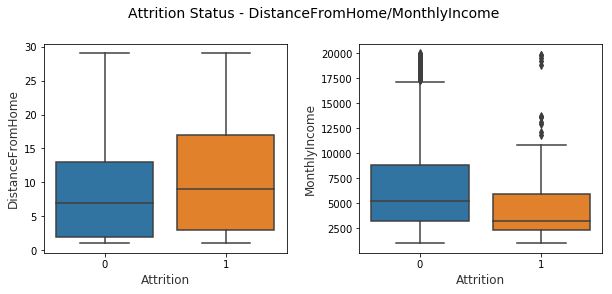

In [27]:
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Attrition Status - DistanceFromHome/MonthlyIncome', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="Attrition", y="DistanceFromHome",
            data=df_hr_new, ax=ax1)
ax1.set_xlabel("Attrition",size = 12,alpha=0.8)
ax1.set_ylabel("DistanceFromHome",size = 12,alpha=0.8)

sns.boxplot(x="Attrition", y="MonthlyIncome", data=df_hr_new, ax=ax2)
ax2.set_xlabel("Attrition",size = 12,alpha=0.8)
ax2.set_ylabel("MonthlyIncome",size = 12,alpha=0.8)

/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


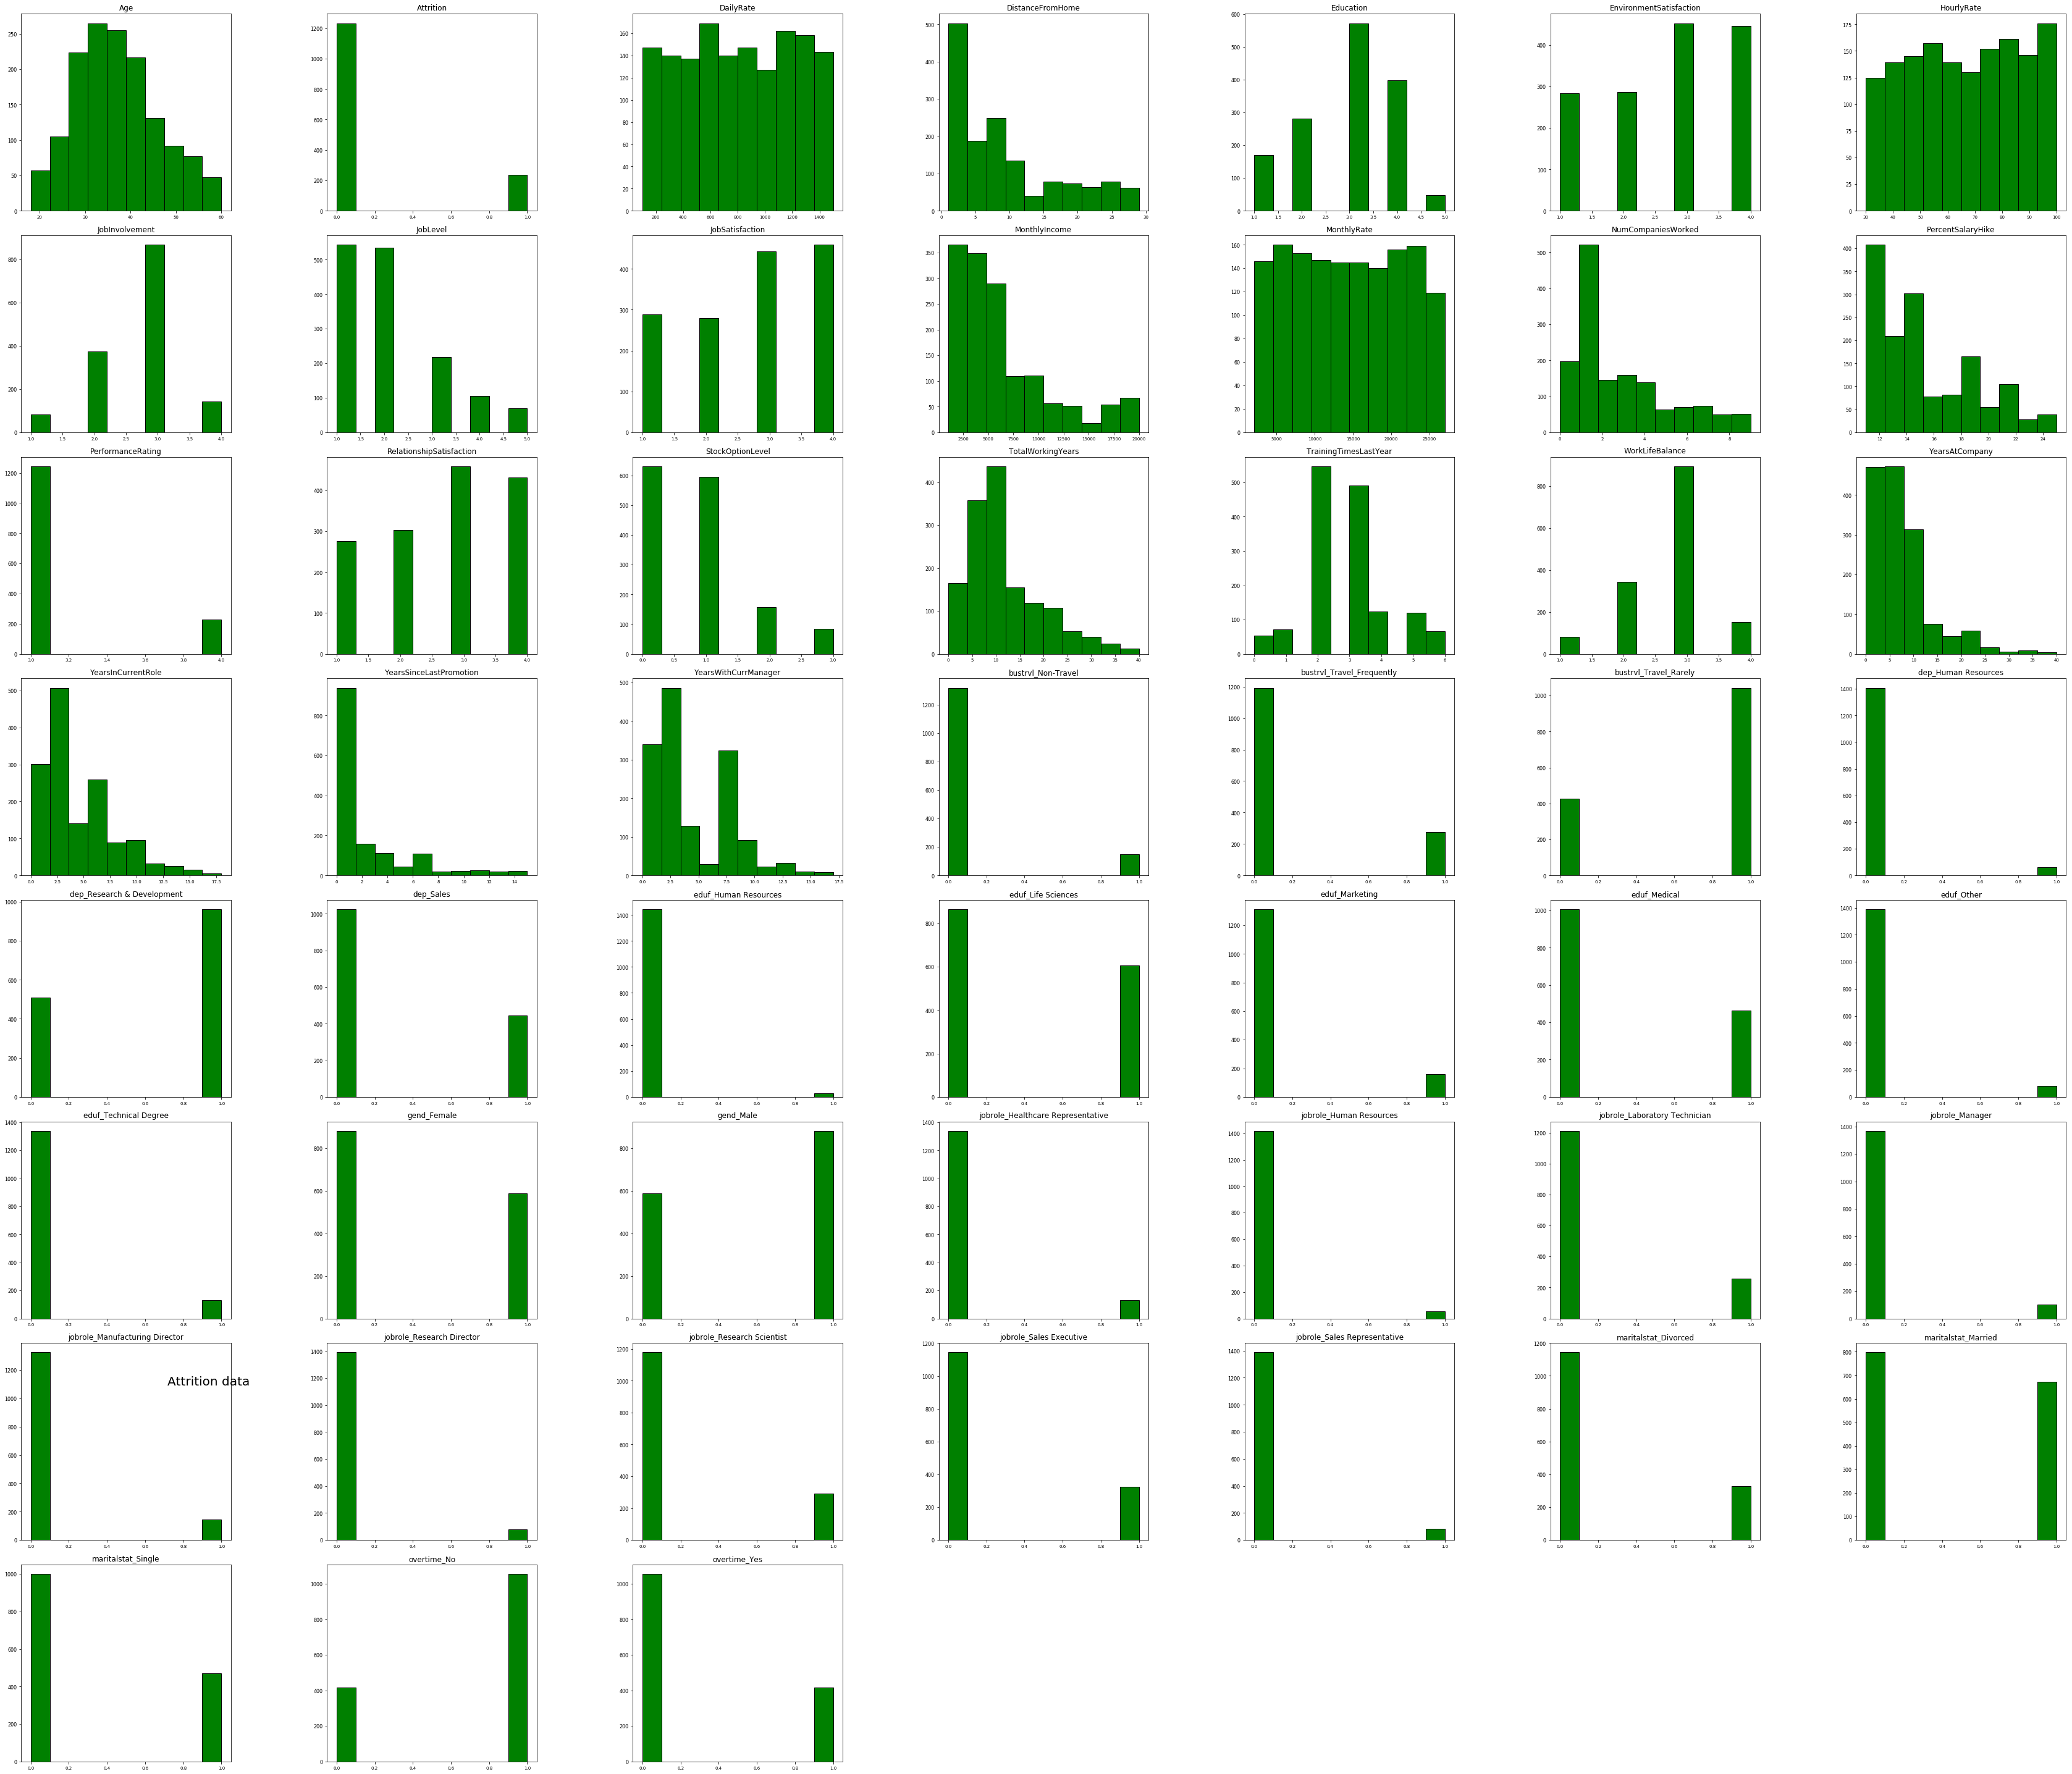

In [28]:
# Univariate analysis
df_hr_new.hist(bins=10, color='green', edgecolor='black', linewidth=1.0,
              xlabelsize=7, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 8, 10))   
rt = plt.suptitle('Attrition data', x=0.9, y=2.25, fontsize=20)

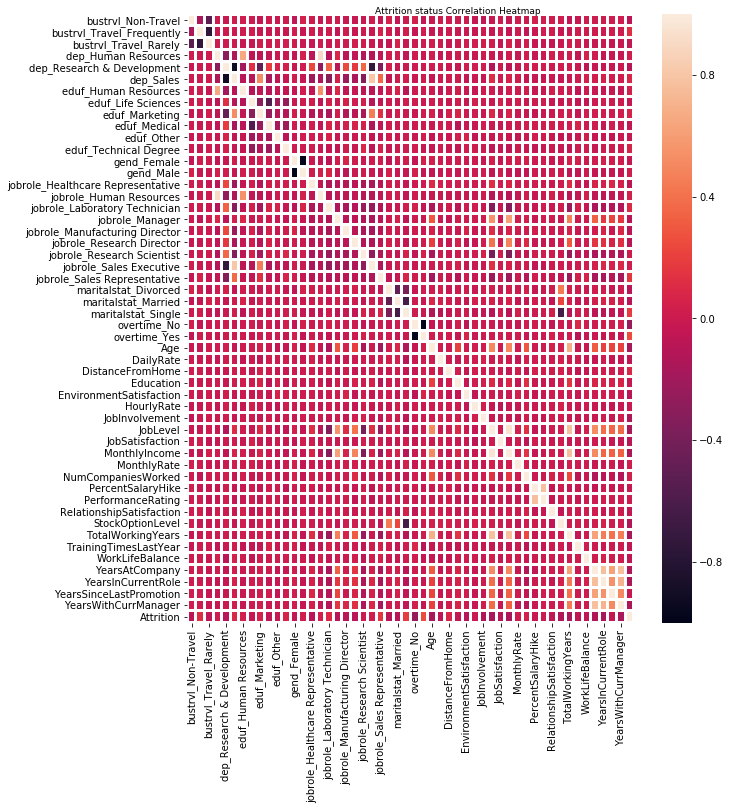

In [29]:
# Multi-Variate Analysis
f, ax = plt.subplots(figsize=(10, 10))
corr = df_hr_new.corr(method='pearson')
hmap = sns.heatmap(round(corr,2), annot=False, ax=ax,fmt='0.0001f',linewidths=2)
f.subplots_adjust(top=0.97)
t_o= f.suptitle('Attrition status Correlation Heatmap', fontsize=9)

In [30]:
# Finding the Correlation values for all the features
(round(df_hr_new.corr(),2))

,bustrvl_Non-Travel,bustrvl_Travel_Frequently,bustrvl_Travel_Rarely,dep_Human Resources,dep_Research & Development,dep_Sales,eduf_Human Resources,eduf_Life Sciences,eduf_Marketing,eduf_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
bustrvl_Non-Travel,1.00,-0.16,-0.53,-0.00,-0.01,0.01,0.02,0.01,-0.03,0.01,...,0.02,0.03,-0.03,-0.02,0.01,0.01,0.01,0.02,0.02,-0.07
bustrvl_Travel_Frequently,-0.16,1.00,-0.75,-0.01,0.00,-0.00,0.01,0.03,-0.02,-0.01,...,0.03,-0.02,-0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.12
bustrvl_Travel_Rarely,-0.53,-0.75,1.00,0.01,0.00,-0.00,-0.02,-0.03,0.03,-0.00,...,-0.04,-0.01,0.03,0.01,-0.01,-0.02,-0.01,-0.03,-0.02,-0.05
dep_Human Resources,-0.00,-0.01,0.01,1.00,-0.29,-0.14,0.65,-0.07,-0.07,-0.05,...,0.03,-0.00,0.01,-0.04,0.05,0.01,-0.04,-0.03,-0.03,0.02
dep_Research & Development,-0.01,0.00,0.00,-0.29,1.00,-0.91,-0.19,0.13,-0.48,0.18,...,-0.00,0.02,0.01,-0.01,-0.07,-0.03,-0.03,-0.02,-0.01,-0.09
dep_Sales,0.01,-0.00,-0.00,-0.14,-0.91,1.00,-0.09,-0.10,0.53,-0.17,...,-0.01,-0.02,-0.01,0.02,0.05,0.03,0.05,0.03,0.03,0.08
eduf_Human Resources,0.02,0.01,-0.02,0.65,-0.19,-0.09,1.00,-0.11,-0.05,-0.09,...,0.04,0.02,0.01,-0.04,-0.00,-0.01,-0.03,-0.02,-0.03,0.04
eduf_Life Sciences,0.01,0.03,-0.03,-0.07,0.13,-0.10,-0.11,1.00,-0.29,-0.57,...,-0.02,-0.02,-0.00,-0.04,-0.04,-0.00,0.02,-0.00,0.00,-0.03
eduf_Marketing,-0.03,-0.02,0.03,-0.07,-0.48,0.53,-0.05,-0.29,1.00,-0.24,...,-0.01,0.02,0.03,-0.03,0.02,0.03,0.03,0.01,0.03,0.06
eduf_Medical,0.01,-0.01,-0.00,-0.05,0.18,-0.17,-0.09,-0.57,-0.24,1.00,...,0.03,0.03,0.02,0.07,0.00,0.01,-0.03,0.02,-0.01,-0.05


/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


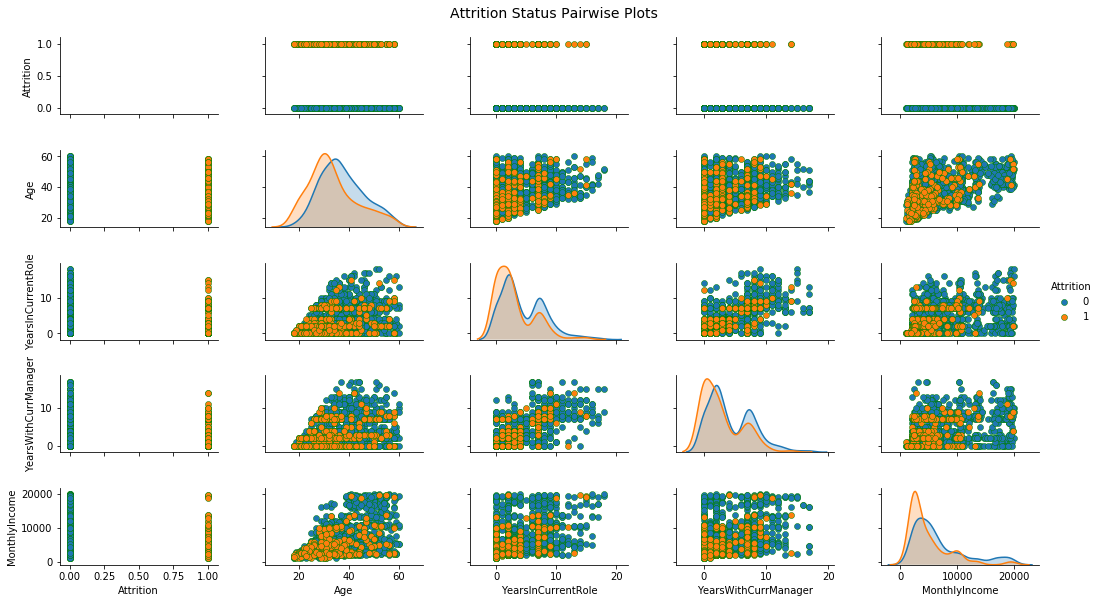

In [31]:
import seaborn as sns
cols = ['Attrition','Age', 'YearsInCurrentRole', 'YearsWithCurrManager','MonthlyIncome']
pp = sns.pairplot(df_hr_new[cols], hue='Attrition', height=1.7, aspect=1.7, 
                  plot_kws=dict(edgecolor="green", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attrition Status Pairwise Plots', fontsize=14)

# Building the Random Forest Model for the Attrition Data

In [32]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(df_hr_new.drop(['Attrition'],axis=1),
                                                 df_hr_new['Attrition'],train_size = 0.6,random_state=1)

/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:
print(x_train.shape)
print(x_test.shape)

(882, 51)
(588, 51)


In [35]:
# We are first building a model with default parameters for RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(x_train, y_train)

/Users/ssg/Desktop/Python/packge/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [37]:
# Declaring a Function to Detect Model’s Accuracy 
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.835034
Test accuracy (ROC AUC Score): 0.555495
Area Under the Precision-Recall Curve: 0.275460


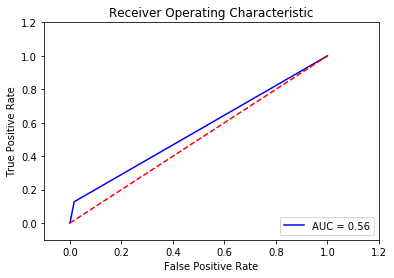

In [38]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_rf.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred)

# Hyper-parameters Tuning for the RF model

In [39]:
# Grid Search for dealing with Overfitting Problem
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline([
        ('clf_rf', RandomForestClassifier(criterion='gini'))
    ])
parameters = {
    'clf_rf__n_estimators' :(10,50,200,500),
    'clf_rf__max_depth' :(5,10,20,50),
    'clf_rf__min_samples_split':(2,3,4),
    'clf_rf__min_samples_leaf': (1,2,3),
    'clf_rf__max_features': ['auto', None, 'log2','sqrt']
}

In [40]:
grid_search = GridSearchCV(pipeline,parameters,cv=2,verbose=1,scoring='precision')
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed:  6.3min finished
/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf_rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf_rf__n_estimators': (10, 50, 200, 500), 'clf_rf__max_depth': (5, 10, 20, 50), 'clf_rf__min_samples_split': (2, 3, 4), 'clf_rf__min_samples_leaf': (1, 2, 3), 'clf_rf__max_features': ['auto', None, 'log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

In [ ]:
print(grid_search.best_params_)

In [41]:
# Training the Model by Applying Decision Tree Classifier
clf_rf_best = RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=5,min_samples_split=4,
                                     max_features='auto',
                                     bootstrap=True,class_weight = {0:0.3,1:0.7},
                                     min_samples_leaf=1,random_state=1)
clf_rf_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.3, 1: 0.7},
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

Model name: Random Forest classifier
Test accuracy (Accuracy Score): 0.848639
Test accuracy (ROC AUC Score): 0.583091
Area Under the Precision-Recall Curve: 0.377499


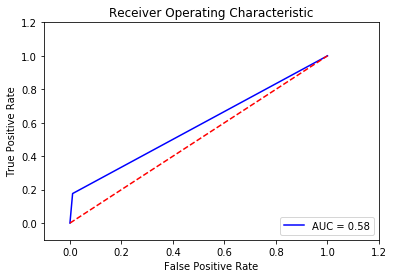

In [43]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_rf_best.predict(x_test)
model_perf('Random Forest classifier', x_train, y_train, y_test,y_pred)

# Model Performance measures

In [44]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                           labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [45]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 Score: 0.81
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.78      0.18      0.29       102
           0       0.85      0.99      0.92       486

   micro avg       0.85      0.85      0.85       588
   macro avg       0.82      0.58      0.60       588
weighted avg       0.84      0.85      0.81       588

Prediction Confusion Matrix:
**********************************************************************
          Predicted:     
                   1    0
Actual: 1         18   84
        0          5  481


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


# Generating Decile Report

In [47]:
# Decile Report
def Decile_report(model, X_train, X_test, Y_train,Y_test):
    y_train = model.predict_proba(X_train)
    tab = np.array((y_train[:,1], Y_train)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    l1 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l1.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    train_decile = pd.DataFrame(l1,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    y_test = model.predict_proba(X_test)
    tab = np.array((y_test[:,1], Y_test)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    
    l2 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l2.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    test_decile = pd.DataFrame(l2,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    return train_decile,test_decile

In [48]:
train_decile, test_decile = Decile_report(clf_rf_best, x_train, x_test, y_train, y_test)

In [49]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,59,0.51,0.63,37.0,37.0,0.63,0.36,3.62
1,1,59,0.36,0.37,22.0,59.0,0.50,0.58,2.88
2,2,59,0.29,0.14,8.0,67.0,0.38,0.66,2.18
3,3,59,0.24,0.17,10.0,77.0,0.33,0.76,1.88
4,4,59,0.21,0.10,6.0,83.0,0.28,0.81,1.62
5,5,59,0.19,0.14,8.0,91.0,0.26,0.89,1.48
6,6,59,0.17,0.02,1.0,92.0,0.22,0.90,1.28
7,7,59,0.15,0.09,5.0,97.0,0.21,0.95,1.19
8,8,58,0.13,0.02,1.0,98.0,0.18,0.96,1.07
9,9,58,0.11,0.07,4.0,102.0,0.17,1.00,1.00


# Getting the feature importance from the RF model

/Users/ssg/Desktop/Python/packge/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


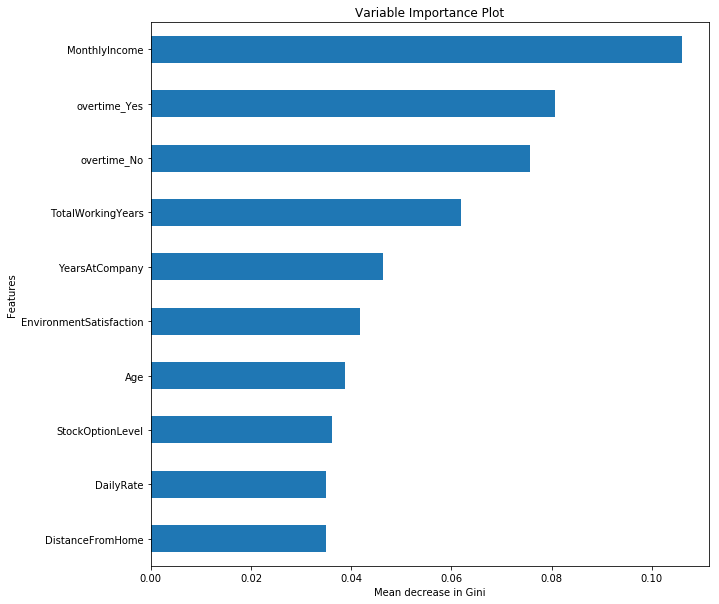

In [50]:
# Plot of Variable importance by mean decrease in gini - Choosing the top 10 features
feature_ranks = pd.Series(clf_rf_best.feature_importances_,index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
feature_ranks.index.name = 'Features'
top_features = feature_ranks.iloc[:10].sort_values(ascending=True,inplace=False)
plt.figure(figsize=(10,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Gini')
_ = ax.set_yticklabels(top_features.index, fontsize=10)

In [51]:
print(dict(zip(df_hr_new.columns, clf_rf_best.feature_importances_)))

{'bustrvl_Non-Travel': 0.008581704528555192, 'bustrvl_Travel_Frequently': 0.012342938504255862, 'bustrvl_Travel_Rarely': 0.002631721912681105, 'dep_Human Resources': 0.00227135912240912, 'dep_Research & Development': 0.007621212286093387, 'dep_Sales': 0.011256159657910674, 'eduf_Human Resources': 0.0031447757419867627, 'eduf_Life Sciences': 0.003363665938687185, 'eduf_Marketing': 0.01390286255662729, 'eduf_Medical': 0.011191992825476248, 'eduf_Other': 0.001019952704445492, 'eduf_Technical Degree': 0.004317623135135702, 'gend_Female': 0.0021293981808897873, 'gend_Male': 0.003066175799103476, 'jobrole_Healthcare Representative': 0.0031035185439149265, 'jobrole_Human Resources': 0.0019421534575714335, 'jobrole_Laboratory Technician': 0.006910728497586282, 'jobrole_Manager': 0.0004956939913742903, 'jobrole_Manufacturing Director': 0.004016342172699829, 'jobrole_Research Director': 0.001255560992662881, 'jobrole_Research Scientist': 0.01098436573363039, 'jobrole_Sales Executive': 0.00675714

# Feature Importance using SHAP Score

In [52]:
import shap
shap.initjs()

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [53]:
explainer = shap.TreeExplainer(clf_rf_best, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
x_test_array = np.array(x_test)
# we need to pass a dense version for the plotting functions

 99%|===================| 1163/1176 [00:59<00:00]        

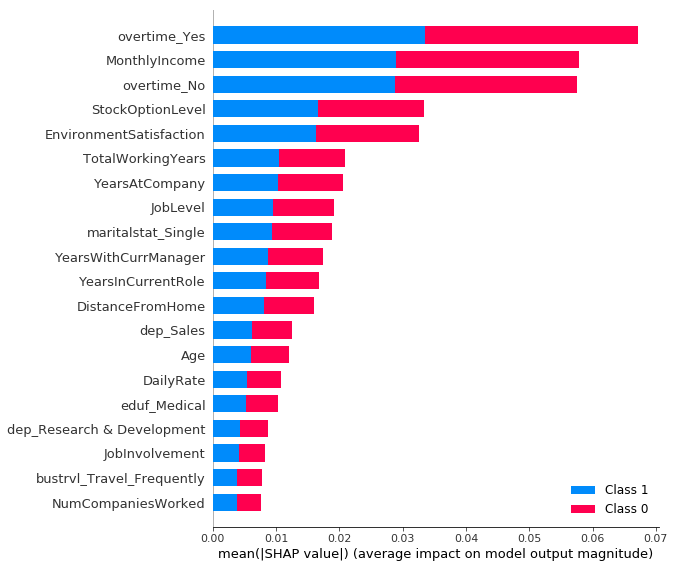

In [54]:
shap.summary_plot(shap_values, x_test_array, feature_names=x_test.columns)